In [ ]:
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import math 
import itertools
from keras.layers import Embedding, Input, dot, concatenate
from keras.models import Model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno


In [ ]:
ratings = pd.read_csv('ratings.csv', sep=',', encoding='latin-1', usecols=['userid', 'movieid', 'rating'])
movies = pd.read_csv('movies.csv', sep=',', encoding='latin-1', usecols=['movieid', 'title', 'genre'])

In [ ]:
X = ratings.iloc[:,:2]
Y = ratings.iloc[:,2]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2000)

In [ ]:
# The number of latent factors for the embedding
n_latent_factors = 50

# no of users and movies
n_users, n_movies = len(ratings['userid'].unique()), len(ratings['movieid'].unique()) 

In [ ]:
# Model Architecture


# User Embeddings
user_input = Input(shape=(1,), name='User_Input')
user_embeddings = Embedding(input_dim = n_users, output_dim=n_latent_factors, input_length=1, 
                              name='User_Embedding') (user_input)
user_vector = Flatten(name='User_Vector') (user_embeddings)


# Movie Embeddings
movie_input = Input(shape=(1,), name='Movie_Input')
movie_embeddings = Embedding(input_dim = n_movies, output_dim=n_latent_factors, input_length=1, 
                               name='Movie_Embedding') (movie_input)
movie_vector = Flatten(name='Movie_Vector') (movie_embeddings)


# Dot Product
merged_vectors = dot([user_vector, movie_vector], name='Dot_Product', axes=1)
model = Model([user_input, movie_input], merged_vectors)

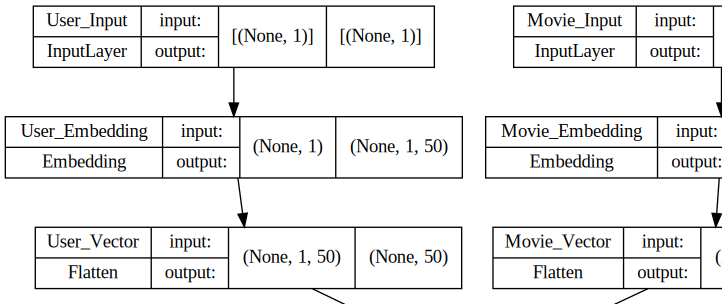

In [ ]:
SVG(model_to_dot( model,  show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 User_Input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Movie_Input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 User_Embedding (Embedding)     (None, 1, 50)        302000      ['User_Input[0][0]']             
                                                                                                  
 Movie_Embedding (Embedding)    (None, 1, 50)        185300      ['Movie_Input[0][0]']            
                                                                                              

In [ ]:
optimizer = Adam(learning_rate = 0.0001)

model.compile(loss='mean_squared_error', optimizer = optimizer)

In [ ]:
batch_size = 128
epochs = 20

In [ ]:
history = model.fit(x=[x_train['userid'], x_train['movieid']], y=y_train, batch_size= batch_size, epochs=epochs, 
                    verbose= 2, validation_data=([x_test['userid'], x_test['movieid']], y_test))

Epoch 1/20
7033/7033 - 22s - loss: 13.9797 - val_loss: 13.3836 - 22s/epoch - 3ms/step
Epoch 2/20
7033/7033 - 19s - loss: 9.6727 - val_loss: 5.5540 - 19s/epoch - 3ms/step
Epoch 3/20
7033/7033 - 19s - loss: 3.5650 - val_loss: 2.4779 - 19s/epoch - 3ms/step
Epoch 4/20
7033/7033 - 20s - loss: 2.0252 - val_loss: 1.7525 - 20s/epoch - 3ms/step
Epoch 5/20
7033/7033 - 19s - loss: 1.5939 - val_loss: 1.5064 - 19s/epoch - 3ms/step
Epoch 6/20
7033/7033 - 19s - loss: 1.4359 - val_loss: 1.4052 - 19s/epoch - 3ms/step
Epoch 7/20
7033/7033 - 19s - loss: 1.3680 - val_loss: 1.3586 - 19s/epoch - 3ms/step
Epoch 8/20
7033/7033 - 20s - loss: 1.3354 - val_loss: 1.3345 - 20s/epoch - 3ms/step
Epoch 9/20
7033/7033 - 19s - loss: 1.3178 - val_loss: 1.3214 - 19s/epoch - 3ms/step
Epoch 10/20
7033/7033 - 19s - loss: 1.3067 - val_loss: 1.3123 - 19s/epoch - 3ms/step
Epoch 11/20
7033/7033 - 20s - loss: 1.2984 - val_loss: 1.3056 - 20s/epoch - 3ms/step
Epoch 12/20
7033/7033 - 19s - loss: 1.2915 - val_loss: 1.3002 - 19s/epoc

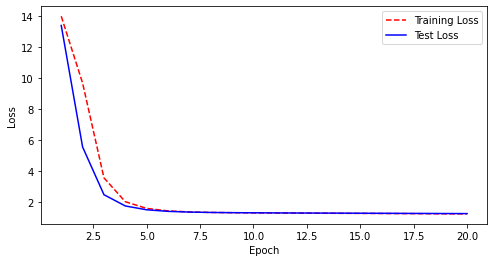

In [ ]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize = (8,4))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
score = model.evaluate([x_test['userid'], x_test['movieid']], y_test)
print()
print('RMSE: {:.4f}'.format(np.sqrt(score)))

3126/3126 [==============================] - 5s 2ms/step - loss: 1.2608

RMSE: 1.1229


In [ ]:
# Model Architecture


# User Embeddings
user_input = Input(shape=(1,), name='User_Input')
user_embeddings = Embedding(input_dim = n_users, output_dim=n_latent_factors, input_length=1, 
                              name='User_Embedding') (user_input)
user_vector = Flatten(name='User_Vector') (user_embeddings)



# Movie Embeddings
movie_input = Input(shape=(1,), name='Movie_Input')
movie_embeddings = Embedding(input_dim = n_movies, output_dim=n_latent_factors, input_length=1, 
                               name='Movie_Embedding') (movie_input)
movie_vector = Flatten(name='Movie_Vector') (movie_embeddings)




# Concatenate Product
merged_vectors = concatenate([user_vector, movie_vector], name='Concantenate')
dense_layer_1 = Dense(100, activation='relu')(merged_vectors) 



result = Dense(1)(dense_layer_1)
model = Model([user_input, movie_input], result)

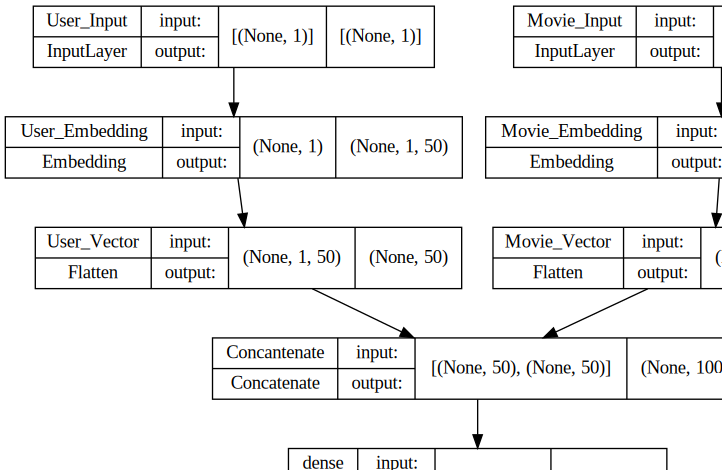

In [ ]:
SVG(model_to_dot( model,  show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 User_Input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Movie_Input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 User_Embedding (Embedding)     (None, 1, 50)        302000      ['User_Input[0][0]']             
                                                                                                  
 Movie_Embedding (Embedding)    (None, 1, 50)        185300      ['Movie_Input[0][0]']            
                                                                                            

In [ ]:
optimizer = Adam(lr=0.0002)

In [ ]:
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [ ]:
batch_size = 128
epochs = 20

In [ ]:
history = model.fit(x=[x_train['userid'], x_train['movieid']], y=y_train, batch_size= batch_size, epochs=epochs, 
                    verbose= 2, validation_data=([x_test['userid'], x_test['movieid']], y_test))

Epoch 1/20
7033/7033 - 21s - loss: 1.3118 - val_loss: 0.8564 - 21s/epoch - 3ms/step
Epoch 2/20
7033/7033 - 21s - loss: 0.8415 - val_loss: 0.8300 - 21s/epoch - 3ms/step
Epoch 3/20
7033/7033 - 21s - loss: 0.8144 - val_loss: 0.8121 - 21s/epoch - 3ms/step
Epoch 4/20
7033/7033 - 21s - loss: 0.7972 - val_loss: 0.8019 - 21s/epoch - 3ms/step
Epoch 5/20
7033/7033 - 21s - loss: 0.7843 - val_loss: 0.7912 - 21s/epoch - 3ms/step
Epoch 6/20
7033/7033 - 21s - loss: 0.7702 - val_loss: 0.7842 - 21s/epoch - 3ms/step
Epoch 7/20
7033/7033 - 21s - loss: 0.7597 - val_loss: 0.7817 - 21s/epoch - 3ms/step
Epoch 8/20
7033/7033 - 21s - loss: 0.7519 - val_loss: 0.7797 - 21s/epoch - 3ms/step
Epoch 9/20
7033/7033 - 21s - loss: 0.7445 - val_loss: 0.7779 - 21s/epoch - 3ms/step
Epoch 10/20
7033/7033 - 21s - loss: 0.7373 - val_loss: 0.7799 - 21s/epoch - 3ms/step
Epoch 11/20
7033/7033 - 21s - loss: 0.7292 - val_loss: 0.7778 - 21s/epoch - 3ms/step
Epoch 12/20
7033/7033 - 21s - loss: 0.7200 - val_loss: 0.7800 - 21s/epoch 

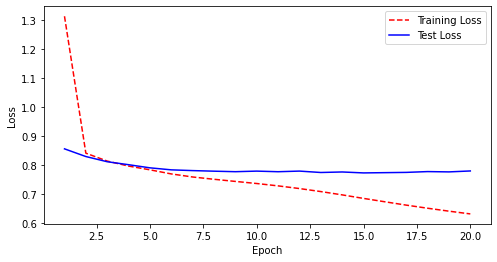

In [ ]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize = (8,4))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
score = model.evaluate([x_test['userid'], x_test['movieid']], y_test)

print()
print('RMSE: {:.4f}'.format(np.sqrt(score)))

3126/3126 [==============================] - 6s 2ms/step - loss: 0.7804

RMSE: 0.8834


In [ ]:
model.save('DMF_Model.h5')

In [ ]:
from keras.models import load_model
dmf_model=load_model('DMF_Model.h5')
dmf_model.load_weights('DMF_Model.h5')

In [ ]:
def predict_rating(userid, movieid):
    return dmf_model.predict([np.array([userid]), np.array([movieid])])[0][0]

In [ ]:
user_ratings = ratings[ratings['userid'] == 2000][['userid', 'movieid', 'rating']]
user_ratings['prediction'] = user_ratings.apply(lambda x: predict_rating(2000, x['movieid']), axis=1)
user_ratings.sort_values(by='prediction', 
                         ascending=False).merge(movies, 
                                                on='movieid', 
                                                how='inner', 
                                                suffixes=['_u', '_m']).head(20)

,userid,movieid,rating,prediction,title,genre
0,2000,527,5,5.028045,Schindler's List (1993),Drama|War
1,2000,318,5,4.742787,"Shawshank Redemption, The (1994)",Drama
2,2000,1193,5,4.742512,One Flew Over the Cuckoo's Nest (1975),Drama
3,2000,2396,3,4.638952,Shakespeare in Love (1998),Comedy|Romance
4,2000,2501,5,4.635888,October Sky (1999),Drama
5,2000,2329,4,4.608972,American History X (1998),Drama
6,2000,1704,4,4.547186,Good Will Hunting (1997),Drama
7,2000,2028,5,4.521736,Saving Private Ryan (1998),Action|Drama|War
8,2000,2324,4,4.505692,Life Is Beautiful (La Vita Ã¨ bella) (1997),Comedy|Drama
9,2000,2858,5,4.494328,American Beauty (1999),Comedy|Drama
